CV基础组队学习-CVPR-北尘南风-Task1

In [10]:
import cv2
import matplotlib.pyplot as plt

祖传代码，解决图中文显示问题

In [12]:
import matplotlib as mpl
# 排除警告信息
import warnings
# matplotlib画图常见参数设置
mpl.rcParams["font.family"] = "SimHei" 
# 设置字体
mpl.rcParams["axes.unicode_minus"]=False 
# 用来正常显示负号
plt.rcParams['font.sans-serif']=['SimHei'] 
# 用来正常显示中文标签# 嵌入式显示图形
%matplotlib inline
warnings.filterwarnings("ignore")

## 插值算法
* 在图像处理中，常常需要改变图像的尺寸，方便后续处理，如超清预处理，图像金子塔。图像处理包含对原图像的缩放，旋转等操作。这里的差值算法在我看来主要是针对图像缩放的算法，及改变尺寸。原图像映射到改变尺寸后的图像时，会产生整数部分之间的坐标，如何合理的设置这些坐标的灰度值，就需要用插值，这里主要有三种方法。
* 1.最临近法
* 2.双线性插值法
* 3.三次内插值法

### 1.最临近法
将映射后的坐标灰度值，设为原图中与之最靠近的像素的灰度，优点是处理速度快，缺点是容易出现锯齿.

Original Dimensions :  (300, 535, 3)


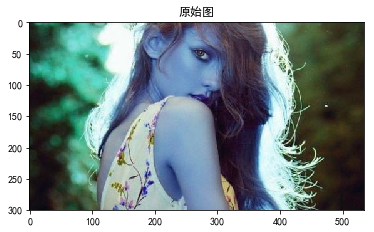

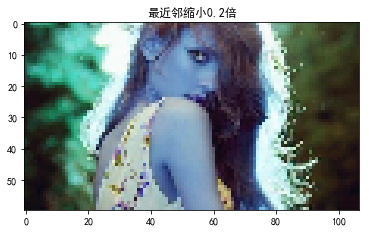

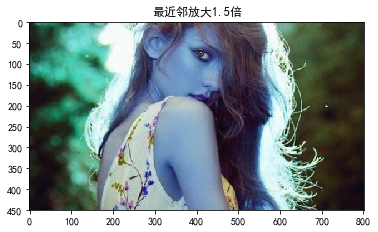

In [16]:
#代码实现，利用imread读取图片，opencv读取格式为BGR,与matplotlib读取图片格式为RGB不同，这里显示会有些不同
img=cv2.imread('E:/Machine Learning/OpenCV/task1.jpg',cv2.IMREAD_UNCHANGED)
print('Original Dimensions : ',img.shape)
#最近邻缩小尺寸为原来0.2倍
scale_percent =0.2    
width = int(img.shape[1] * scale_percent)
height = int(img.shape[0] * scale_percent)
dim = (width, height)
img_l = cv2.resize(img, dim, interpolation = cv2.INTER_NEAREST)#选用最近邻
#这里进行放大1.5倍
fx = 1.5
fy = 1.5
# OPenCV中对图像的操作都放在了resize这个函数中
resized_NN = cv2.resize(img,dsize=None, fx=fx, fy=fy,interpolation = cv2.INTER_NEAREST)
#利用plt在线显示图片
plt.figure(1)
plt.imshow(img)
plt.title('原始图')
plt.figure(2)
plt.imshow(img_l)
plt.title('最近邻缩小0.2倍')
plt.figure(3)
plt.imshow(resized_NN)
plt.title('最近邻放大1.5倍')
plt.show()

### 2.双线性插值
* 双线性内插法是利用待求象素四个邻象素的灰度在两个方向上作线性内插
对于 (i, j+v)，f(i, j) 到 f(i, j+1)的灰度变化为线性关系，则有：

　　　f(i, j+v) = [f(i, j+1) - f(i, j)] *v + f(i, j)

同理对于 (i+1, j+v) 则有：

      f(i+1,j+v) = [f(i+1, j+1) - f(i+1, j)] * v + f(i+1, j)

从f(i, j+v) 到 f(i+1, j+v)的灰度变化也为线性关系，由此可推导出待求象素灰度的计算式如下：

     f(i+u, j+v) = (1-u) * (1-v) * f(i, j) + (1-u) * v * f(i, j+1) + u *(1-v) * f(i+1, j) + u * v * f(i+1, j+1)

双线性内插法的计算比最邻近点法复杂，计算量较大，但没有灰度不连续的缺点，结果基本令人满意。它具有低通滤波性质，使高频分量受损，图像轮廓可能会有一点模糊。

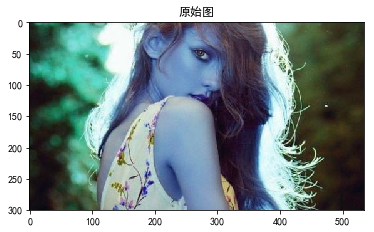

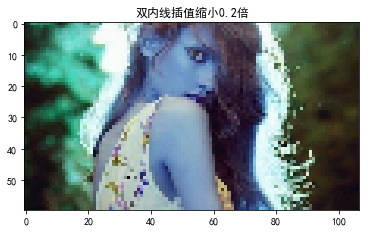

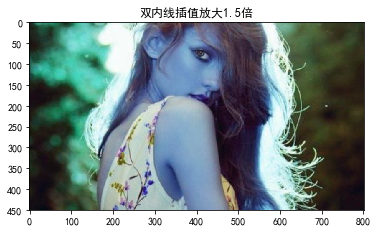

In [19]:
#OpenCV中双内线插值为INTER_LINEAR
#双内线插值缩小尺寸为原来0.2倍
img_l_2 = cv2.resize(img, dim, interpolation = cv2.INTER_LINEAR)
#这里进行放大1.5倍
fx = 1.5
fy = 1.5
resized_2 = cv2.resize(img,dsize=None, fx=fx, fy=fy,interpolation = cv2.INTER_LINEAR)
#利用plt在线显示图片
plt.figure(1)
plt.imshow(img)
plt.title('原始图')
plt.figure(2)
plt.imshow(img_l_2)
plt.title('双内线插值缩小0.2倍')
plt.figure(3)
plt.imshow(resized_2)
plt.title('双内线插值放大1.5倍')
plt.show()

### 3.三次多项式插值
该方法利用三次多项式S(x)求逼近理论上最佳插值函数sin(x)/x

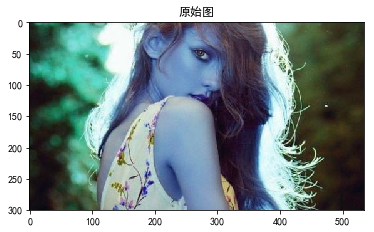

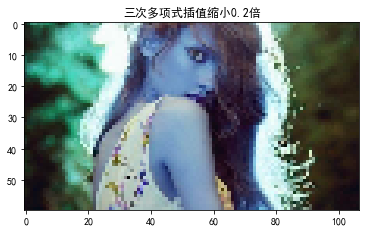

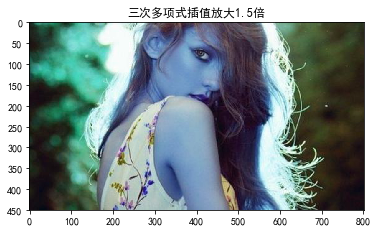

In [18]:
#OpenCV中三次多项式插值为INTER_CUBIC
#三次多项式缩小尺寸为原来0.2倍
img_l_3 = cv2.resize(img, dim, interpolation = cv2.INTER_CUBIC)
#这里进行放大1.5倍
fx = 1.5
fy = 1.5
resized_3 = cv2.resize(img,dsize=None, fx=fx, fy=fy,interpolation = cv2.INTER_CUBIC)
#利用plt在线显示图片
plt.figure(1)
plt.imshow(img)
plt.title('原始图')
plt.figure(2)
plt.imshow(img_l_3)
plt.title('三次多项式插值缩小0.2倍')
plt.figure(3)
plt.imshow(resized_3)
plt.title('三次多项式插值放大1.5倍')
plt.show()

### 总结
*插值操作为图像处理的基础操作，常用方法有临近法，二次线性插值，三次多项式插值。其中临近法速度快，但在放大图像时容易出现锯齿。二次线性效果较好，三次效果最好，但运算速度较慢。
详细如下：
图像大小变换函数：
void cvResize( const CvArr* src,CvArr* dst, int interpolation=CV_INTER_LINEAR ); 
src输入图像.dst输出图像.interpolation插值方法:
#### 其中：
* CV_INTER_NN - 最近邻插值,
* CV_INTER_LINEAR - 双线性插值 (缺省使用)
* CV_INTER_AREA - 使用象素关系重采样。当图像缩小时候，该方法可以避免波纹出现。当图像放大时，类似于CV_INTER_NN 方法..
* CV_INTER_CUBIC - 立方插值.
* 函数 cvResize 将图像 src 改变尺寸得到与dst 同样大小。若设定 ROI，函数将按常规支持 ROI.